In [1]:
import sys
print(sys.executable)

/home/time/miniconda3/envs/cardio_env/bin/python


# This is Heart Disease Prediction Project
we are going to predict based on the data whether someone has the heart disease or not

* ###  1- Problem Definition
* ##### based on the given data we need to predict if a patient has heart disease or not
* ###  2- Data
* ##### we have the data and have loaded it already
* ###  3- Evaluate
* ##### in initial stages we need to make sure,if our model gives us the accuracy of 95%
* ###  4- Feature
* ##### what features are to import,what features columns means what
###### Data Dictionary

* **age** - age in years
* **sex** - (1 = male; 0 = female)
* **cp** - chest pain type
* **trestbps** - resting blood pressure (in mm Hg on admission to the hospital)
* **chol** - serum cholestoral in mg/dl
* **fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* **restecg** - resting electrocardiographic results
* **thalach** - maximum heart rate achieved
* **exang** - exercise induced angina (1 = yes; 0 = no)
* **oldpeak** - ST depression induced by exercise relative to rest
* **slope** - the slope of the peak exercise ST segment
* **ca** - number of major vessels (0-3) colored by flourosopy
* **thal** - 3 = normal; 6 = fixed defect; 7 = reversable defect
* **target** - have disease or not (1=yes, 0=no)

Quick Observation on your Project Structure

Looking at your first screenshot, your folder structure is perfect:

    data/: Your CSV is safely tucked away.

    models/: Ready for when you start saving your RandomForest or LogisticRegression results.

    notebooks/: Where your current work lives.

Next Step: Data Exploration (EDA)

Now that the "paperwork" is done, it's time to actually look at the data. Usually, the first things we check are:

    Is the data balanced? (How many 1s vs 0s in the target column?)

    Are there missing values?

Would you like me to provide the code to create a "Correlation Matrix" so you can see which of these features (like thalach or cp) has the strongest relationship with the target?
* ###  5- Modelling
* ###  6- Experimentations

# Tools Prepration

In [2]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

print("All libraries imported successfully!")

All libraries imported successfully!


# Exploring the Data Initial Stage

1- What problem i am going to solve

2- What kind of data i have

3- Does this data have missing values

4- Are there any outliers, spurious 

5- Can we add or remove some of the 


In [3]:
df = pd.read_csv("../data/heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


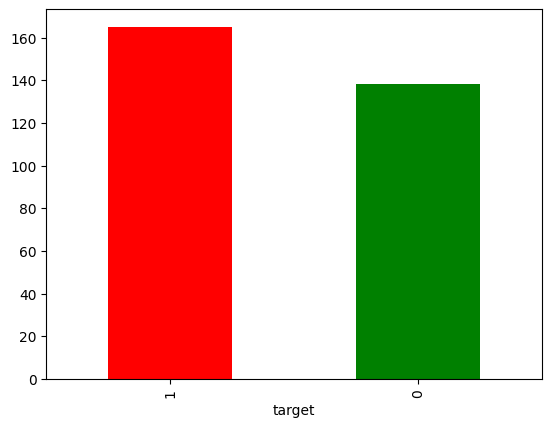

In [6]:
df['target'].value_counts().plot(kind='bar',color=['red','green']);

In [7]:
df.isna().sum() #Are there any missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
len(df)

303

In [11]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


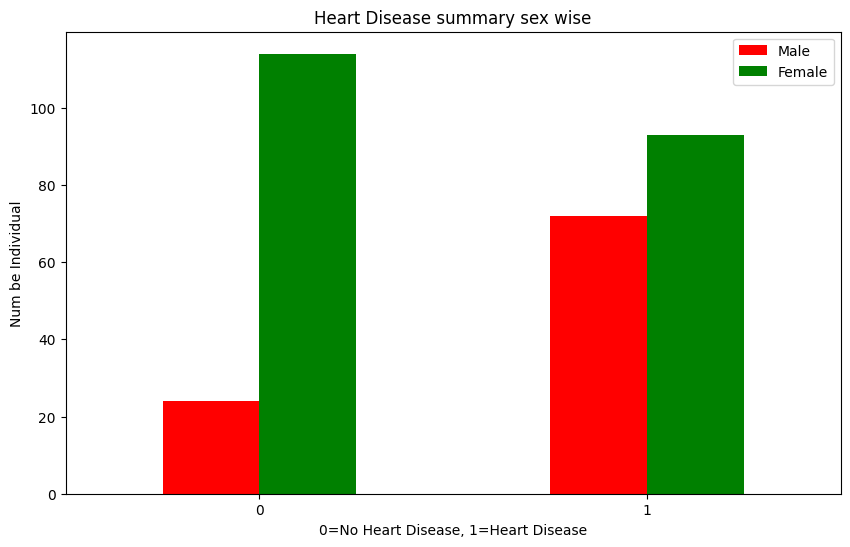

In [12]:
pd.crosstab(df.target,df.sex).plot(kind = 'bar',
                                  figsize=(10,6),
                                  color=['red','green'])
plt.title('Heart Disease summary sex wise')
plt.xlabel('0=No Heart Disease, 1=Heart Disease')
plt.ylabel("Num be Individual")
plt.legend(["Male","Female"])
plt.xticks(rotation=0);

In [13]:
##project-1 Part 01||202.Be careful with plot choice

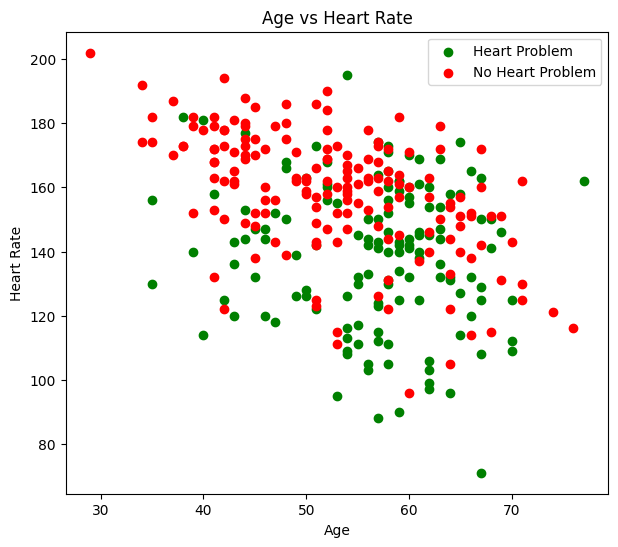

In [14]:
# Finding Patterns in Data Using Scatter Plot
plt.figure(figsize=(7,6))
# Create scatter plot
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='green')
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='red')
## surkhi powder hahah
plt.title('Age vs Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.legend(["Heart Problem","No Heart Problem"]);

In [15]:
 ##project-1 Part 01| 203. Scator Plot to see any Pattern

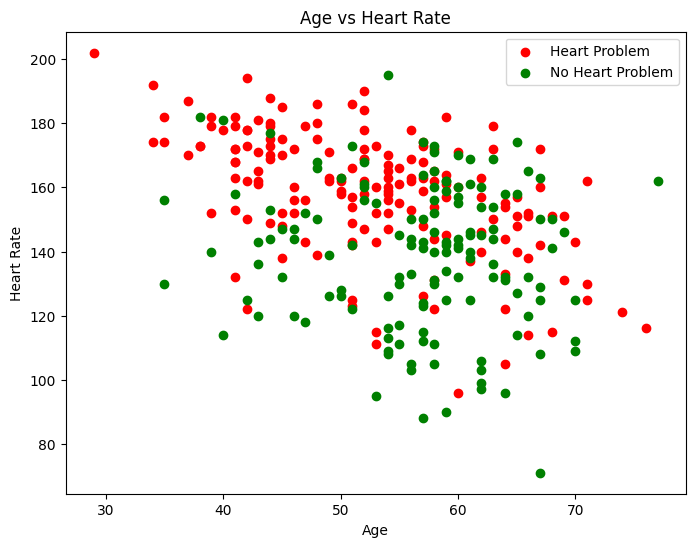

In [16]:
# Finding Pattrens in Data using Scatter Plot
plt.figure(figsize=(8,6))
# Create scatter plot
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="red")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='green');
## surkhi powder hahah
plt.title('Age vs Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.legend(["Heart Problem","No Heart Problem"]);

In [17]:
# Project-1 Part 01 | 204.Age Distribution

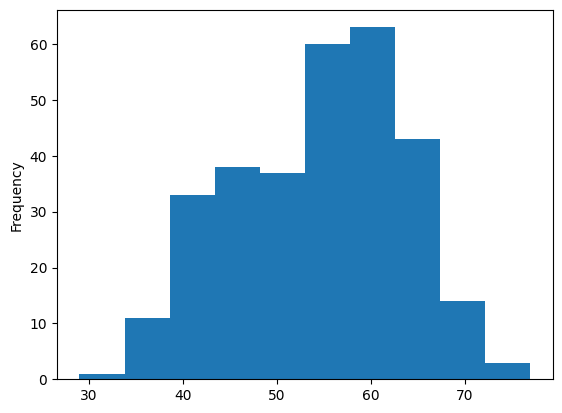

In [18]:
# Create Histogram to see age Distribution (to check relation age vs heart rate) heart is skewed to higher age level
df.age.plot.hist();

In [19]:
# Project-1 Part 01 |205.Chest pain type and Target relation Part 01

In [20]:
df.cp.value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

*  **cp** => chest pain type
    * Value 0: typical angina: Chest pain dues to decrease blood pressure
    * Value 1: atypical angina: Chest Pain not related to Heart Problem
    * Value 2: non-anginal pain: Not Heart Related
    * Value 3: asymptomatic: Chest Pain not showing Heart Problem

In [21]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


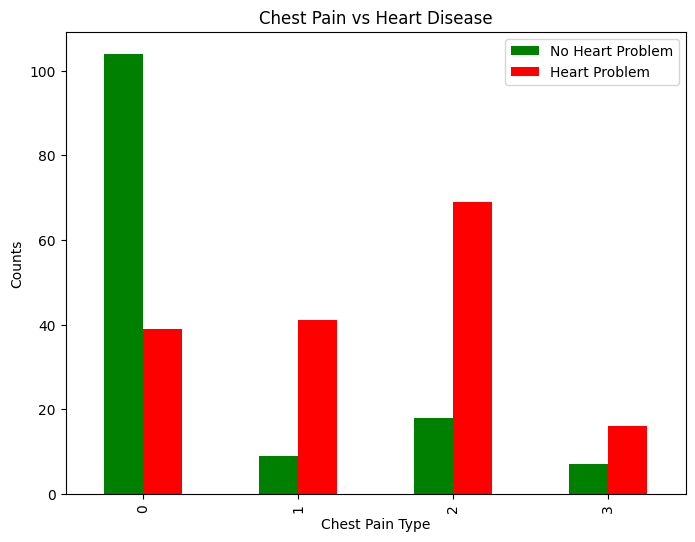

In [22]:
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                 figsize=(8,6),
                                 color=['green','red'])
# Make some discription of the Chart
plt.title('Chest Pain vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Counts')
plt.legend(["No Heart Problem","Heart Problem"]);

In [23]:
# Project-1 Part 01 |207.Correlation Matrix Part 1

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


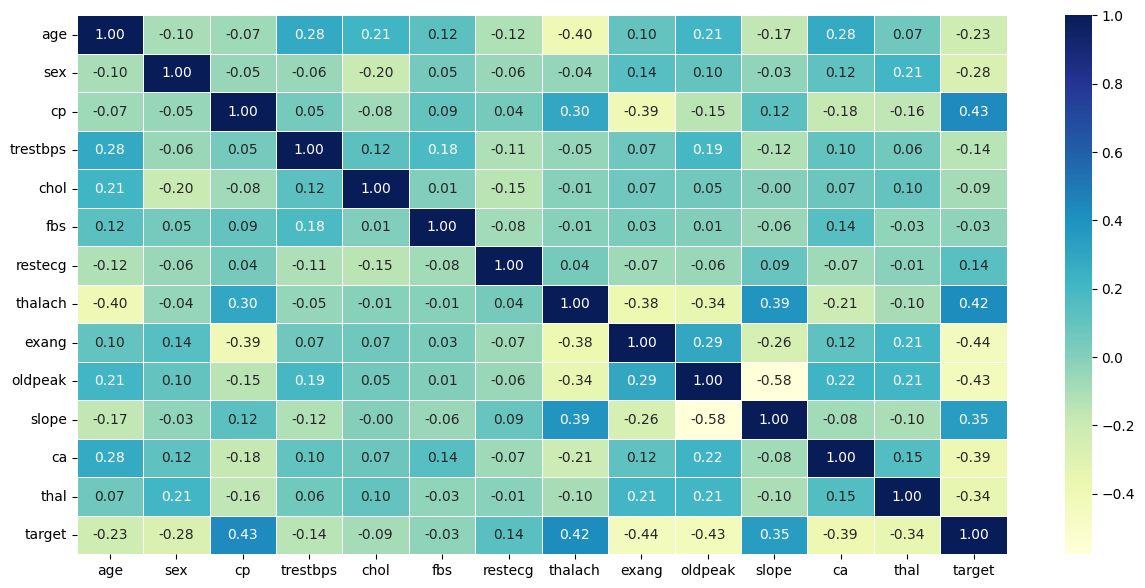

In [26]:
#Lets Draw Corelation Map
cor_map = df.corr()
home,room = plt.subplots(figsize=(15,7))
room = sns.heatmap(cor_map,
                   annot=True,
                   linewidths=0.5,
                   fmt="0.2f",
                   cmap="YlGnBu");
plt.xticks(rotation=0);

* ###  1- Problem Definition
* ##### we have a data and we need to predict if a patient has heart disease or not

* ###  2- Evaluate
*  we need accuracy of 95%
* ###  3- Modelling


In [27]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [28]:
# 1. Prepare data
X = df.drop("target", axis=1)
y = df["target"]

In [29]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [30]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [31]:
# 2. Split into train and test sets (Essential step!)
np.random.seed(7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
len(X)

303

In [33]:
len(X_train)

242

# The Models we are going to use

1.K-Nearest Neighbiurs Classifier
2.Logistic Regression
3.Random Forest Classifier



In [34]:
# 3. Putting the models into a Dictionary 
models = {
    "KNN": KNeighborsClassifier(), 
    "Random Forest": RandomForestClassifier(), 
    "Logistic Regression": LogisticRegression(max_iter=1000) # Increased from 100 if it is 100 error will raise raid text when we try to get result of all three logestic reg etc
}
# 4. Create Function to evaluate the models 
def fit_and_score(models, X_train, X_test, y_train, y_test): 
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    """
    # Make a Dictionary to keep model scores
    model_scores = {} 
    
    # Looping through models
    for name, model in models.items(): # Fixed .items()
        model.fit(X_train, y_train) 
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test) 
        
    return model_scores # Moved outside the loop

In [35]:
# 5. Execute
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                             X_test=X_test, 
                             y_train=y_train, 
                             y_test=y_test) 

print(model_scores)

{'KNN': 0.5573770491803278, 'Random Forest': 0.7213114754098361, 'Logistic Regression': 0.7704918032786885}


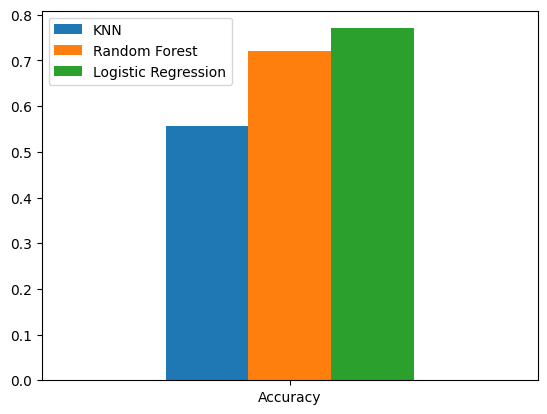

In [36]:
model_compare = pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.plot.bar();
plt.xticks(rotation=0);

# Improving and Tuning the Model (Roadmap)

 * ### Universal Methods used for all Classifications problems

       * Hyperparameter Tunning

       * Features Improving

* ### Advanced Level

       * Confusion_Matrix

       * Cross_validation

       * Precision

       * Recall

       * f1

       * Classification Report

       * ROC Curve

# Now starting
* Hyperparameter Tuning:
* Feature Improving:

In [37]:
# 1.K-Nearest Neighbiurs Classifier
train_score = []
test_score = []
#Create range to be test for n_neighbors
nneighbors = range(1,30)
# KNN Instance
KNN = KNeighborsClassifier()
# Looping though the range
for i in  nneighbors:
    KNN.set_params(n_neighbors=i)
    # Run the fit for i th  value
    KNN.fit(X_train,y_train)
    # Update the Training score
    train_score.append(KNN.score(X_train,y_train))
    # Update the test score list
    test_score.append(KNN.score(X_test,y_test))


    

In [38]:
train_score

[1.0,
 0.8099173553719008,
 0.7768595041322314,
 0.756198347107438,
 0.7603305785123967,
 0.731404958677686,
 0.743801652892562,
 0.7148760330578512,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.7231404958677686,
 0.731404958677686,
 0.71900826446281,
 0.7148760330578512,
 0.6900826446280992,
 0.7272727272727273,
 0.71900826446281,
 0.7107438016528925,
 0.7066115702479339,
 0.7024793388429752,
 0.7024793388429752,
 0.7107438016528925,
 0.6900826446280992,
 0.7107438016528925,
 0.7066115702479339,
 0.7107438016528925,
 0.7066115702479339,
 0.7066115702479339]

# Project-1 Part 02 | 212.Plotting the Improved Model Score

Max KNN Score:70.49%


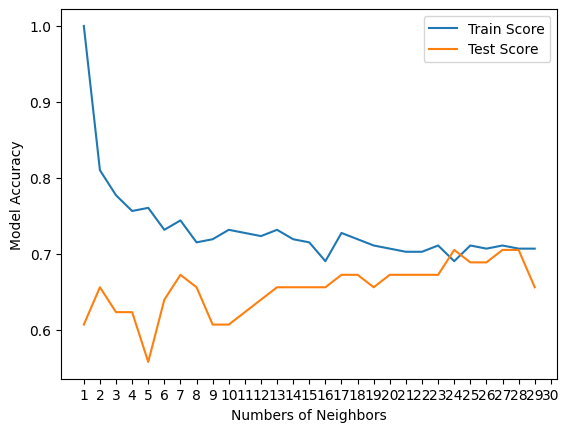

In [39]:
#1.K-Nearest Neighbiurs Classifier
plt.plot(nneighbors,train_score, label="Train Score")
plt.plot(nneighbors,test_score, label="Test Score")
plt.xticks(np.arange(1,31,1))
plt.xlabel('Numbers of Neighbors')
plt.ylabel('Model Accuracy')
plt.legend();
print(f"Max KNN Score:{max(test_score)*100:0.2f}%")

# Hyperparameter tunning using Randomized Search CV

* 2.Logistic Regression
* 3.Random Forest Classifier



In [40]:
# 2.Logistic Regression
LR_hp = {
    "C": np.logspace(-4,4,20),
    "solver":["liblinear"]
        }
RFC_hp = {
    "n_estimators":np.arange(10,1600,100),
    "max_depth":[None,3,5,6,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(2,20,2),
}

In [41]:
# Tune Logistic Regression
np.random.seed(7)
# Lets Use RSCV to tune HP

lr = RandomizedSearchCV(LogisticRegression(),
                       param_distributions=LR_hp,
                       cv=5,
                       n_iter=20,
                       verbose=True)
#Fit the random HP search model for LR
lr.fit(X_train,y_train)
#print(lr) # print if you want to see text output

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegression()
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",20
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fol

In [42]:
print(lr) # print if you want to see text output for above output

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)


In [43]:
# now we check kya koi improvement hoi?
lr.score(X_test,y_test)

0.7540983606557377

In [44]:
lr.best_params_

{'solver': 'liblinear', 'C': np.float64(0.615848211066026)}

In [45]:
#
# Tune Random Forest Classifier
np.random.seed(7)
# Lets Use RSCV to tune HP

rfc = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=RFC_hp,
                       cv=5,
                       n_iter=20,
                       verbose=True)
#Fit the random HP search model for LR
rfc.fit(X_train,y_train)
#print(rfc) # print if you want to see text output

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestClassifier()
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 2, 4..., 14, 16, 18]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ..., 1410, 1510])}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",20
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-valid

In [46]:
print(rfc) #text formed output of above output

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 6, 10],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510])},
                   verbose=True)


In [47]:
# now we check kya koi improvement hoi?
rfc.score(X_test,y_test)

0.7213114754098361

In [48]:
rfc.best_params_

{'n_estimators': np.int64(710),
 'min_samples_split': np.int64(16),
 'min_samples_leaf': np.int64(8),
 'max_depth': 10}

# Original values vs hyperparameter Tunned values
* 'KNN': 0.5573770491803278, we already dropped it due to bad score
* 'Random Forest': 0.7540983606557377,  after Hyperparameter Tuning : 0.7213114754098361
* 'Logistic Regression': 0.7704918032786885  after Hyperparameter Tuning: 0.7540983606557377

2. Tuning Methods Progress

  * 1. By Hand Hyperparameter Tunning # Done it been there, seen it all

  * 2. Randomized Search CV # Done it been there, seen it all

  * 3. GridSearchCV # Lets try this one

In [49]:
# Hyperparameter tunning using GridSearch CV

In [50]:
# Tune Logistic Regression with GridSearchCV
np.random.seed(7)

lr_gs = GridSearchCV(LogisticRegression(),
                     param_grid=LR_hp, # Removed the 's'
                     cv=5,
                     # n_iter=20, <-- Removed this line entirely
                     verbose=True)

# Fit the grid HP search model for LR
lr_gs.fit(X_train, y_train)
#print(lr_gs) # print if you want to see text output

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegression()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the

In [51]:
print(lr_gs) # print if you want to see text form of above output

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)


In [52]:
lr_gs.score(X_test,y_test)

0.7540983606557377

In [53]:
lr_gs.best_params_

{'C': np.float64(0.615848211066026), 'solver': 'liblinear'}

* 'KNN': 0.5573770491803278, we already dropped it due to bad score
* 'Random Forest': 0.7540983606557377,  after Hyperparameter Tuning : 0.7213114754098361
* 'Logistic Regression': 0.7704918032786885  after Hyperparameter Tuning: 0.7540983606557377 after GridSearchCV>>> 0.7540983606557377

# Project-1 Part 03 |218. Summarizing

1. Improving and Tuning the Model (Roadmap)

    Universal Methods used for all Classifications problems

       * Hyperparameter Tunning

       * Features Improving

    ##### Advanced Level
       * ROC Curve
   
       * Confusion_Matrix

       * Cross_validation

       * Precision

       * Recall

       * f1

       * Classification Report

   

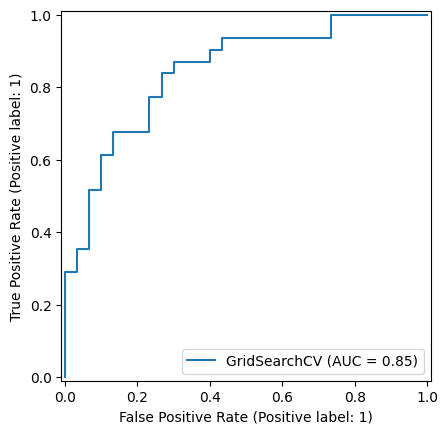

In [54]:
#219......
# Plotting the Area under the Curve
lr_gs.predict(X_test)
# Plotting the Area under the Curve (AUC) using the new method
RocCurveDisplay.from_estimator(lr_gs, X_test, y_test);

In [55]:
# Project-1 Part 03 | 220.Area under the curve and confusion matrix

In [56]:
# 1. Create the y_preds variable by making predictions
y_preds = lr_gs.predict(X_test)

# 2. Now you can print the confusion matrix

print(confusion_matrix(y_test, y_preds))

[[18 12]
 [ 3 28]]


(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

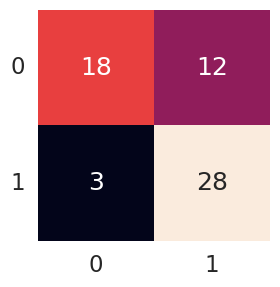

In [57]:
sns.set(font_scale=1.5)

def plot_confusion(y_test,y_preds):
    "This is plot the confusion matrix"

    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
plot_confusion(y_test,y_preds)   
plt.yticks(rotation=0)

Based on your specific numbers (18, 12, 3, 28):

    True Negatives (18): The model correctly predicted 18 people were healthy (Class 0).

    False Positives (12): The model wrongly predicted 12 healthy people had a cardio issue. This is "Type I Error."

    False Negatives (3): The model missed 3 people who actually have a cardio issue. This is "Type II Error."

    True Positives (28): The model correctly identified 28 people with a cardio issue (Class 1).

# Let's Plot the classification report

In [58]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.70      0.90      0.79        31

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.75        61
weighted avg       0.78      0.75      0.75        61



In [59]:
lr_gs.best_params_
lr = LogisticRegression(C=0.615848211066026,
                        solver="liblinear")

In [60]:
# Cross validated Accuracy
cv_accuracy = cross_val_score(lr,
                             X,
                             y,
                             cv=7,
                             scoring="accuracy")
cv_accuracy =np.mean(cv_accuracy)
cv_accuracy

np.float64(0.8284506191482934)

In [61]:
# Cross validated precision
cv_precision = cross_val_score(lr,
                             X,
                             y,
                             cv=7,
                             scoring="precision")
cv_precision =np.mean(cv_precision)
cv_precision

np.float64(0.8108267922553637)

In [62]:
# Cross validated recall
cv_recall = cross_val_score(lr,
                             X,
                             y,
                             cv=7,
                             scoring="recall")
cv_recall =np.mean(cv_recall)
cv_recall

np.float64(0.89648033126294)

In [63]:
# Cross validated f1-score
cv_f1 = cross_val_score(lr,
                             X,
                             y,
                             cv=7,
                             scoring="f1")
cv_f1 =np.mean(cv_f1)
cv_f1

np.float64(0.8508447334977947)

# 223. Visualizing the cross Validated Matrics

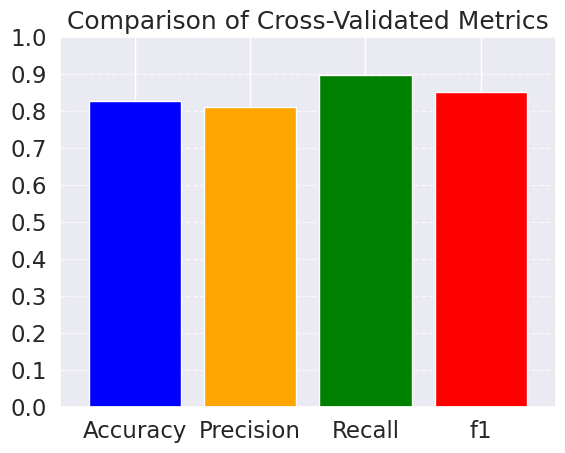

In [64]:
# 1. Calculate the average of each metric
# 1. Your metrics (make sure these are the averages/means)
cv_metrics = pd.DataFrame({
    "Accuracy": np.mean(cv_accuracy),
    "Precision": np.mean(cv_precision),
    "Recall": np.mean(cv_recall),
    "f1": np.mean(cv_f1)
}, index=[0])


# 1. Define your colors
colors = ["blue", "orange", "green", "red"]

# 2. Use .iloc[0] to turn the row into a Series before plotting
# This allows 'color' to apply to each individual bar
ax = cv_metrics.iloc[0].plot.bar(title="Comparison of Cross-Validated Metrics",
                            color=colors,
                            width=0.8,  # This fills 100% of the category space
                            edgecolor="white"); # Optional: adds a thin line to separate bars);

# 3. Add more detailed yticks
# This creates ticks from 0.0 to 1.0 with a step of 0.1
ax.set_yticks(np.arange(0, 1.1, 0.1))

# 4. Add the dotted grid lines (now there will be more of them!)
ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# 5. Clean up labels
plt.xticks(rotation=0)
plt.show()

# Project-1 Part 03
# 224. Features Improvement
# Features Improving # Zara Zara  touch me .....

In [65]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [66]:
# Check Coeffiecient
lr.fit(X_train,y_train)
lr.coef_

array([[ 0.02252678, -1.36972472,  0.79033601, -0.02405914, -0.00188849,
         0.45615731,  0.40549708,  0.03558521, -0.78346587, -0.56674308,
         0.52855363, -0.64573418, -1.10278199]])

In [67]:
final_coef = dict(zip(df.columns,list(lr.coef_[0])))
final_coef

{'age': np.float64(0.02252678088859591),
 'sex': np.float64(-1.3697247235123737),
 'cp': np.float64(0.790336009798431),
 'trestbps': np.float64(-0.024059142708206346),
 'chol': np.float64(-0.001888490478208966),
 'fbs': np.float64(0.45615730903073565),
 'restecg': np.float64(0.4054970774699765),
 'thalach': np.float64(0.03558520921757022),
 'exang': np.float64(-0.7834658685604866),
 'oldpeak': np.float64(-0.5667430774730721),
 'slope': np.float64(0.5285536289797753),
 'ca': np.float64(-0.6457341797406612),
 'thal': np.float64(-1.1027819922077673)}

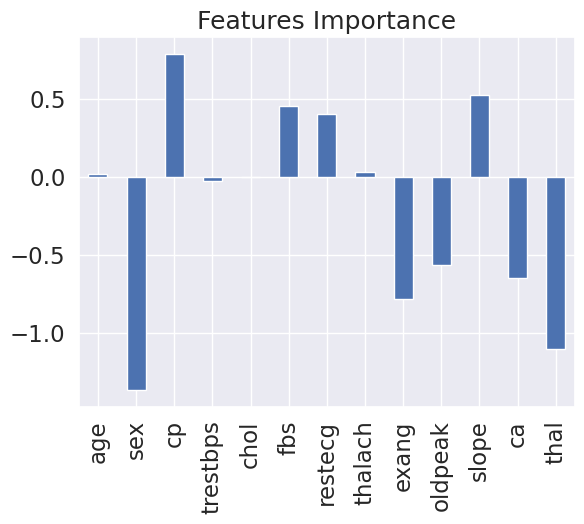

In [68]:
features = pd.DataFrame(final_coef,index=[0])
features.T.plot.bar(title="Features Importance", legend=False);

# 💾 Saving with Joblib (Recommended)

In [69]:
import joblib

# Save the model to a file
joblib.dump(lr_gs, filename="tuned_logistic_regression_model.joblib")

['tuned_logistic_regression_model.joblib']

# 📂 How to Load it later

When you start a new project or build a website, you can bring the model back to life with just one

In [71]:
# Load the saved model
loaded_model = joblib.load(filename="tuned_logistic_regression_model.joblib")

# Use it to make a prediction
# loaded_model.predict(new_data)

# 225. CONCLUSION:::

 * we set 95% accuracy goal,but we did not meet
 * we can ask some Question
 * what if we try to get more data
 * What if we try to improve the quality of the data
 * What if we try to use other models and see if there is any improvement